In [1]:
# Imports

## Networking
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Standard
import choix
import networkx as nx

## Stats
import scipy.stats as stats

%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

# Data Importing and Organization

In [2]:
# Getting the data

df_alr_path = '/home/clachris/Documents/projects/Inter and Intra Rater Evaluation/Rankings/Alryalat_compare_results_01_03_2023.csv'
df_itt_path = '/home/clachris/Documents/projects/Inter and Intra Rater Evaluation/Rankings/Ittoop_compare_results_01_03_2023.csv'
df_laz_path = '/home/clachris/Documents/projects/Inter and Intra Rater Evaluation/Rankings/Lazcano_compare_results_01_03_2023.csv'
df_mal_path = '/home/clachris/Documents/projects/Inter and Intra Rater Evaluation/Rankings/Malik_compare_results_01_03_2023.csv'
df_sei_path = '/home/clachris/Documents/projects/Inter and Intra Rater Evaluation/Rankings/Seibold_compare_results_01_03_2023.csv'

df_alr = pd.read_csv(df_alr_path)
df_itt = pd.read_csv(df_itt_path)
df_laz = pd.read_csv(df_laz_path)
df_mal = pd.read_csv(df_mal_path)
df_sei = pd.read_csv(df_sei_path)

print(f'There are {len(df_alr), len(df_itt), len(df_laz), len(df_mal), len(df_sei)}')
df_alr.head()


There are (1226, 1225, 1225, 1225, 1225)


user                                               date  winner  \
0  Alryalat  Tue Dec 13 2022 05:35:19 GMT+0200 (Eastern Eur...       0   
1  Alryalat      Thu Dec 15 2022 00:01:07 GMT+0300 (GMT+03:00)       0   
2  Alryalat      Thu Dec 15 2022 15:09:11 GMT+0300 (GMT+03:00)       0   
3  Alryalat      Sat Dec 17 2022 19:38:13 GMT+0300 (GMT+03:00)       0   
4  Alryalat      Sat Dec 17 2022 10:59:01 GMT+0300 (GMT+03:00)       0   

   image0  image1 image_name_0 image_name_1 diagnosis_original_0  \
0      45     107    Im078.bmp    Im017.bmp               Normal   
1      85     107    Im085.bmp    Im017.bmp               Normal   
2      49     107    Im068.bmp    Im017.bmp               Normal   
3      13     107    Im011.bmp    Im017.bmp               Normal   
4       9     107    Im072.bmp    Im017.bmp               Normal   

  diagnosis_original_1           justification  \
0                Early  optional justification   
1                Early  optional justification   
2                Early  optional justification   
3                Early  optional justification   
4                Early  optional justification   

                               task                      task_list_name  \
0  a17e186f5324b3558b9b953395294f0e  opthamology_rim-one_50_CompareList   
1  a17e186f5324b3558b9b953395294f0e  opthamology_rim-one_50_CompareList   
2  a17e186f5324b3558b9b953395294f0e  opthamology_rim-one_50_CompareList   
3  a17e186f5324b3558b9b953395294f0e  opthamology_rim-one_50_CompareList   
4  a17e186f5324b3558b9b953395294f0e  opthamology_rim-one_50_CompareList   

   task_idx  
0         0  
1       494  
2       555  
3      1082  
4       821

In [3]:
# Combining their images

all_img_0 = list(df_alr['image0']) + list(df_itt['image0']) + list(df_laz['image0']) + list(df_mal['image0']) + list(df_sei['image0']) 
all_img_1 = list(df_alr['image1']) + list(df_itt['image1']) + list(df_laz['image1']) + list(df_mal['image1']) + list(df_sei['image1']) 
all_img_names = list(set([j for i in [all_img_0, all_img_1] for j in i] ))
print(f'There are {len(all_img_names)} images in the comparison study.')

There are 50 images in the comparison study.


In [4]:
# Creating a dictionary between simple numerical values and the image names

all_img_names.sort()
nx_names = list(range(0,50))
dict_img_names_nx_vals = {}
 
for i in nx_names:
    new_key = all_img_names[i]
    new_value = i
    dict_img_names_nx_vals = {**dict_img_names_nx_vals, new_key: new_value}

In [5]:
# Getting the image pairs and winners

# Getting the image pairs and winners by rater and overall

cutoff = -1

## By rater

img1_alr = list(df_alr['image0'])
img1_itt = list(df_itt['image0'])
img1_laz = list(df_laz['image0'])
img1_mal = list(df_mal['image0'])
img1_sei = list(df_sei['image0'])

img1_alr_conv = list(pd.Series(img1_alr).map(dict_img_names_nx_vals))
img1_itt_conv = list(pd.Series(img1_itt).map(dict_img_names_nx_vals))
img1_laz_conv = list(pd.Series(img1_laz).map(dict_img_names_nx_vals))
img1_mal_conv = list(pd.Series(img1_mal).map(dict_img_names_nx_vals))
img1_sei_conv = list(pd.Series(img1_sei).map(dict_img_names_nx_vals))

img2_alr = list(df_alr['image1'])
img2_itt = list(df_itt['image1'])
img2_laz = list(df_laz['image1'])
img2_mal = list(df_mal['image1'])
img2_sei = list(df_sei['image1'])

img2_alr_conv = list(pd.Series(img2_alr).map(dict_img_names_nx_vals))
img2_itt_conv = list(pd.Series(img2_itt).map(dict_img_names_nx_vals))
img2_laz_conv = list(pd.Series(img2_laz).map(dict_img_names_nx_vals))
img2_mal_conv = list(pd.Series(img2_mal).map(dict_img_names_nx_vals))
img2_sei_conv = list(pd.Series(img2_sei).map(dict_img_names_nx_vals))

results_alr = list(df_alr['winner'])
results_itt = list(df_itt['winner'])
results_laz = list(df_laz['winner'])
results_mal = list(df_mal['winner'])
results_sei = list(df_sei['winner']) 

## Combined

img1_all_conv = img1_alr_conv + img1_itt_conv + img1_laz_conv + img1_mal_conv + img1_sei_conv
img2_all_conv = img2_alr_conv + img2_itt_conv + img2_laz_conv + img2_mal_conv + img2_sei_conv
results_all = results_alr + results_itt + results_laz + results_mal + results_sei
print(len(results_all))

6126


In [6]:
# Generating pairs

## By rater
alr_pairs = list(zip(img1_alr_conv, img2_alr_conv))
itt_pairs = list(zip(img1_itt_conv, img2_itt_conv))
laz_pairs = list(zip(img1_laz_conv, img2_laz_conv))
mal_pairs = list(zip(img1_mal_conv, img2_mal_conv))
sei_pairs = list(zip(img1_sei_conv, img2_sei_conv))

## Combined
all_pairs = list(zip(img1_all_conv, img2_all_conv))
print(len(all_pairs))

6126


In [7]:
# Rearranging them by winner

def rearrange_by_winner(pair_set, results_for_pairs):
    pairs_results = []

    for i in range(len(pair_set)):
        if results_for_pairs[i] == 0: # Leave the pair as is
            pairs_results.append(pair_set[i])
        elif results_for_pairs[i] == 1: # Switch the pairs around
            pair_mod = (pair_set[i][1], pair_set[i][0])
            pairs_results.append(pair_mod)
        else: # This is when the results = -1 and is a tie. We are going to ignore them for now.
            continue

    return pairs_results

cutoff = -1

## By rater
alr_pairs_rear = rearrange_by_winner(alr_pairs, results_alr)[:cutoff]
itt_pairs_rear = rearrange_by_winner(itt_pairs, results_itt)[:cutoff]
laz_pairs_rear = rearrange_by_winner(laz_pairs, results_laz)[:cutoff]
mal_pairs_rear = rearrange_by_winner(mal_pairs, results_mal)[:cutoff]
sei_pairs_rear = rearrange_by_winner(sei_pairs, results_sei)[:cutoff]

# Together
all_pairs_rear = rearrange_by_winner(all_pairs, results_all)[:cutoff]

# Preliminary Investigation

## Graphing

In [8]:
# Graph and cycle generating function

n_items = 50 # Number of images

def gen_graph_cycles(pair_set, title):

    graph = nx.DiGraph() # Creates a graph
    graph.add_edges_from(pair_set) # Creates edges and nodes from the data
    fig = plt.figure(1, figsize=(25, 25), dpi=45)
    nx.draw(graph, node_size=1000,font_size=20, with_labels=True)   
    plt.title(title) 
    plt.show()

    return graph

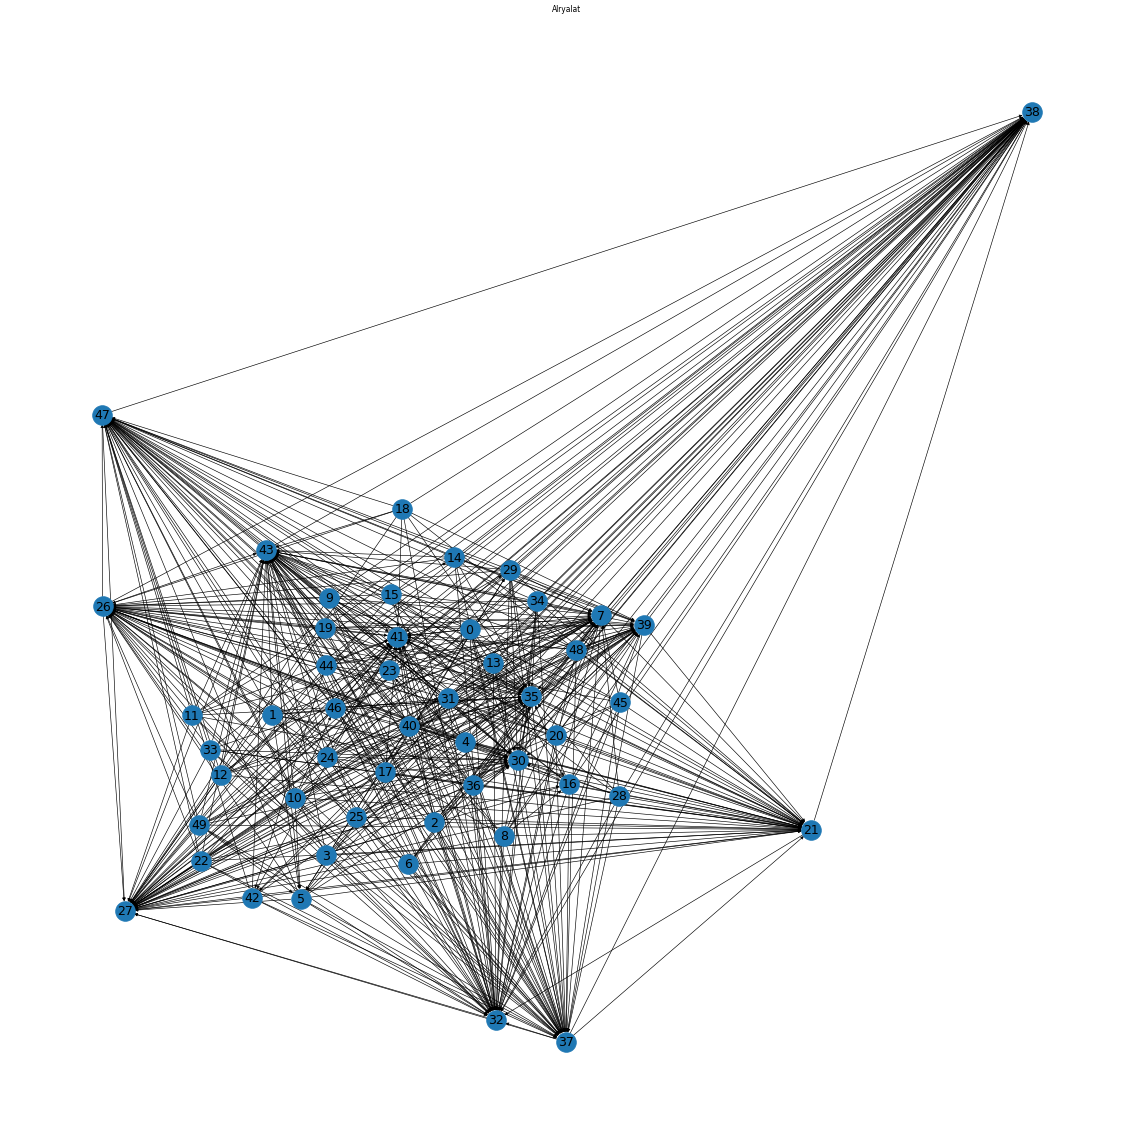

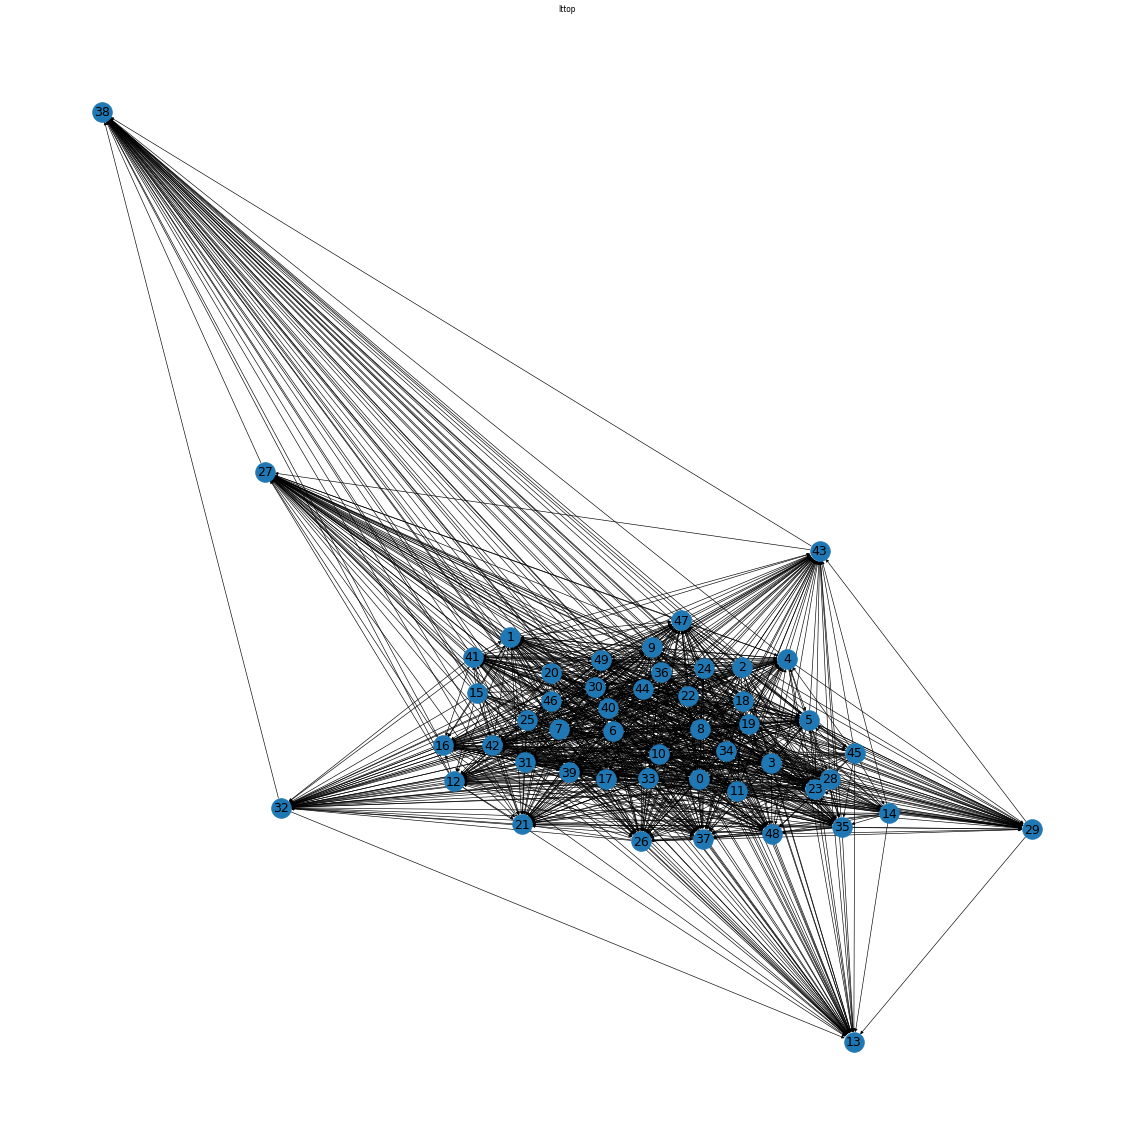

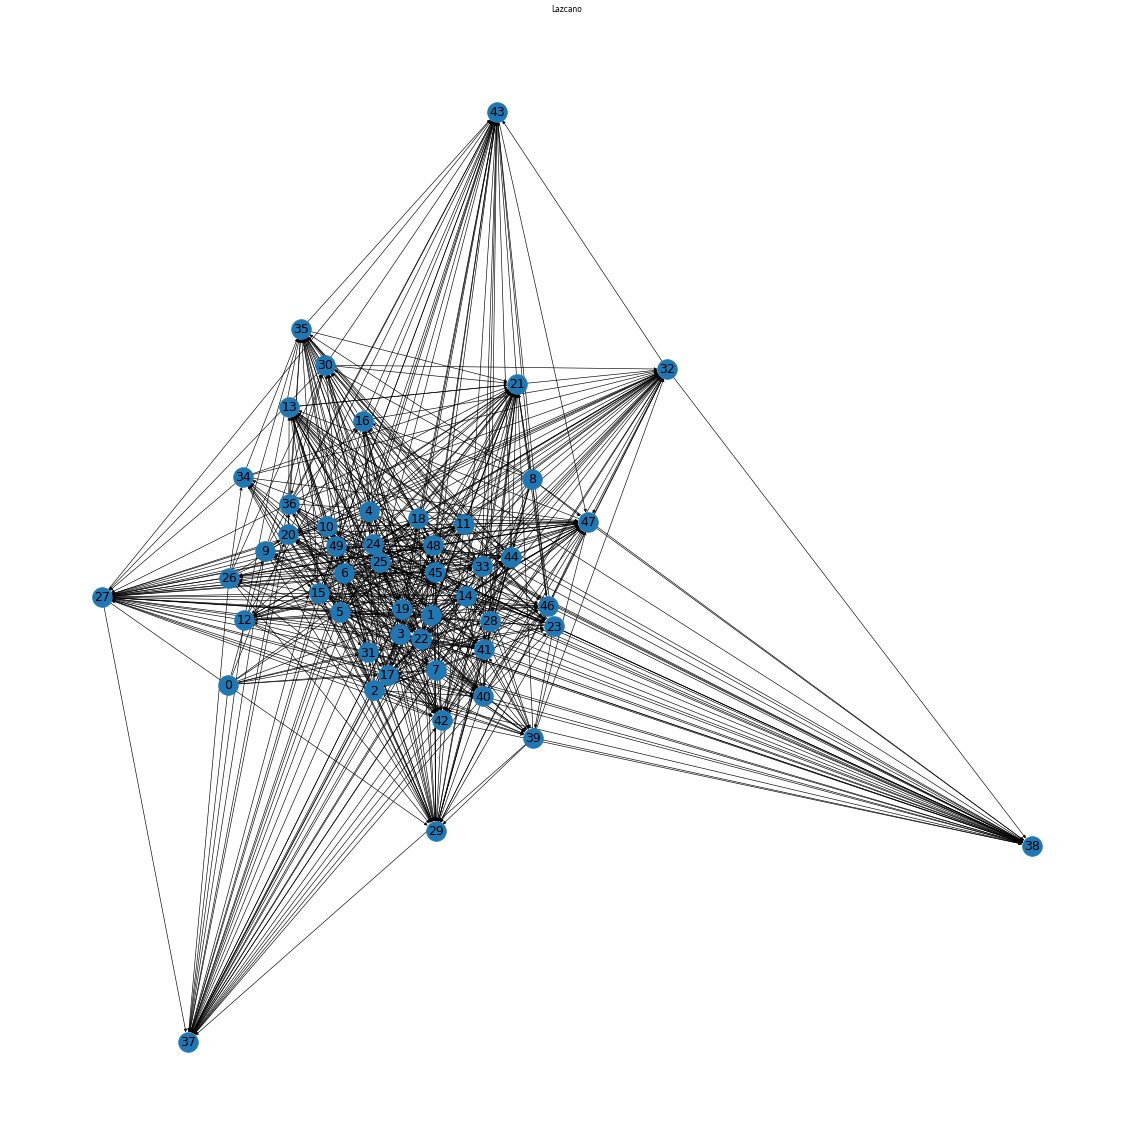

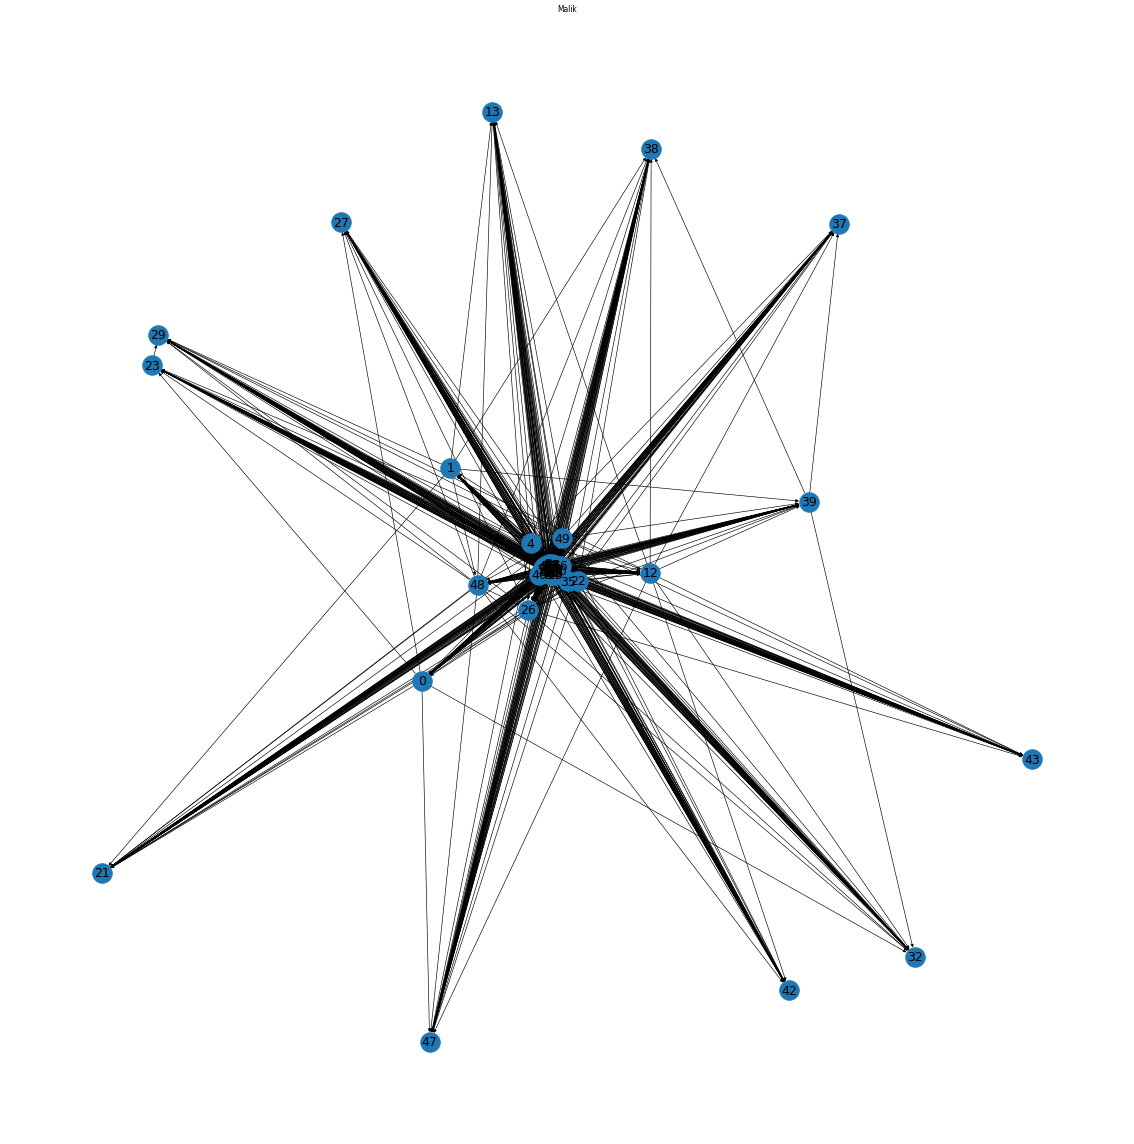

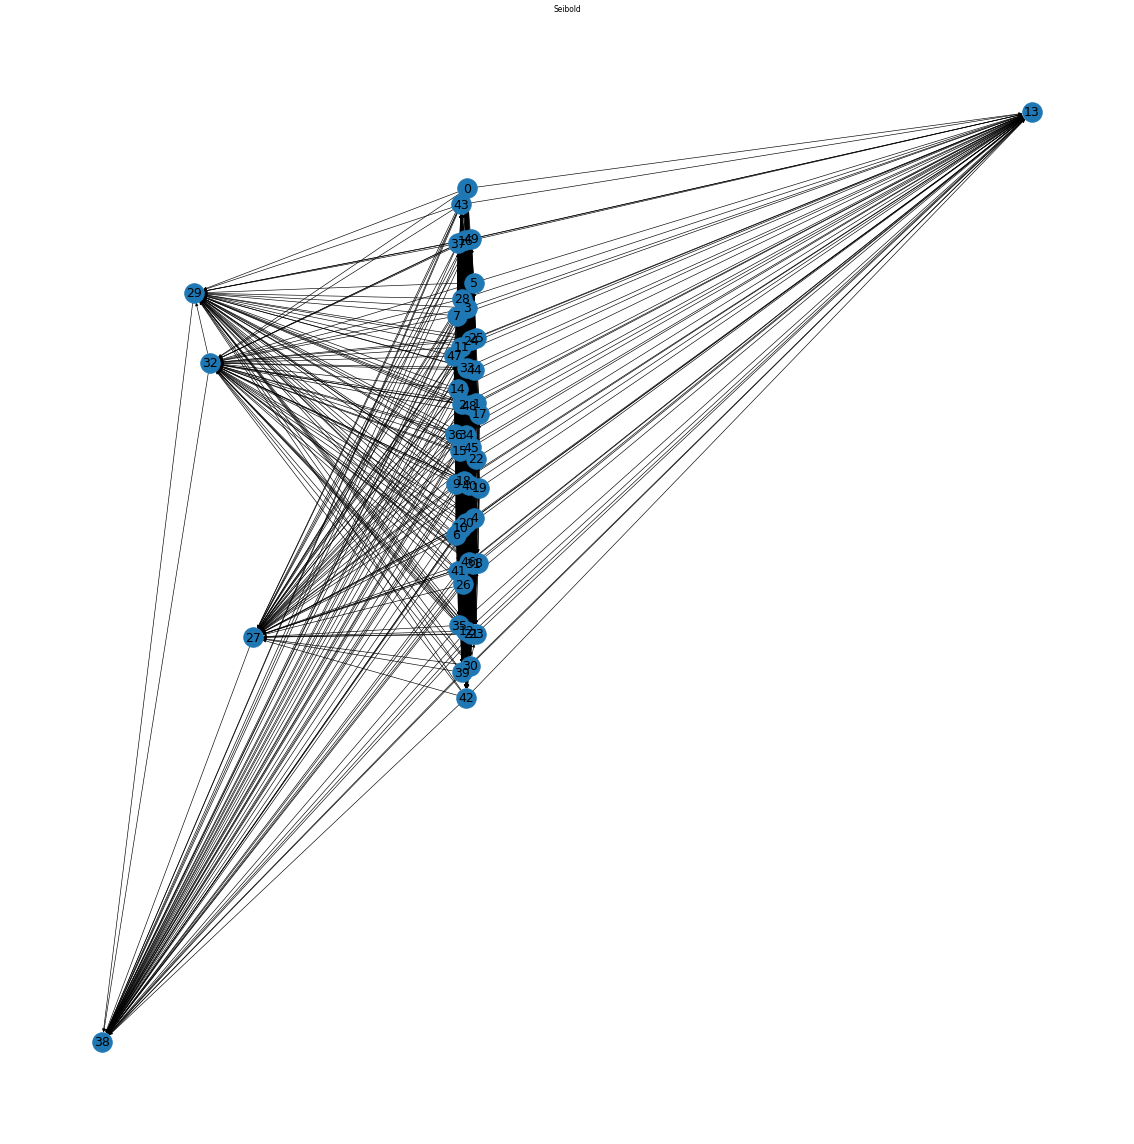

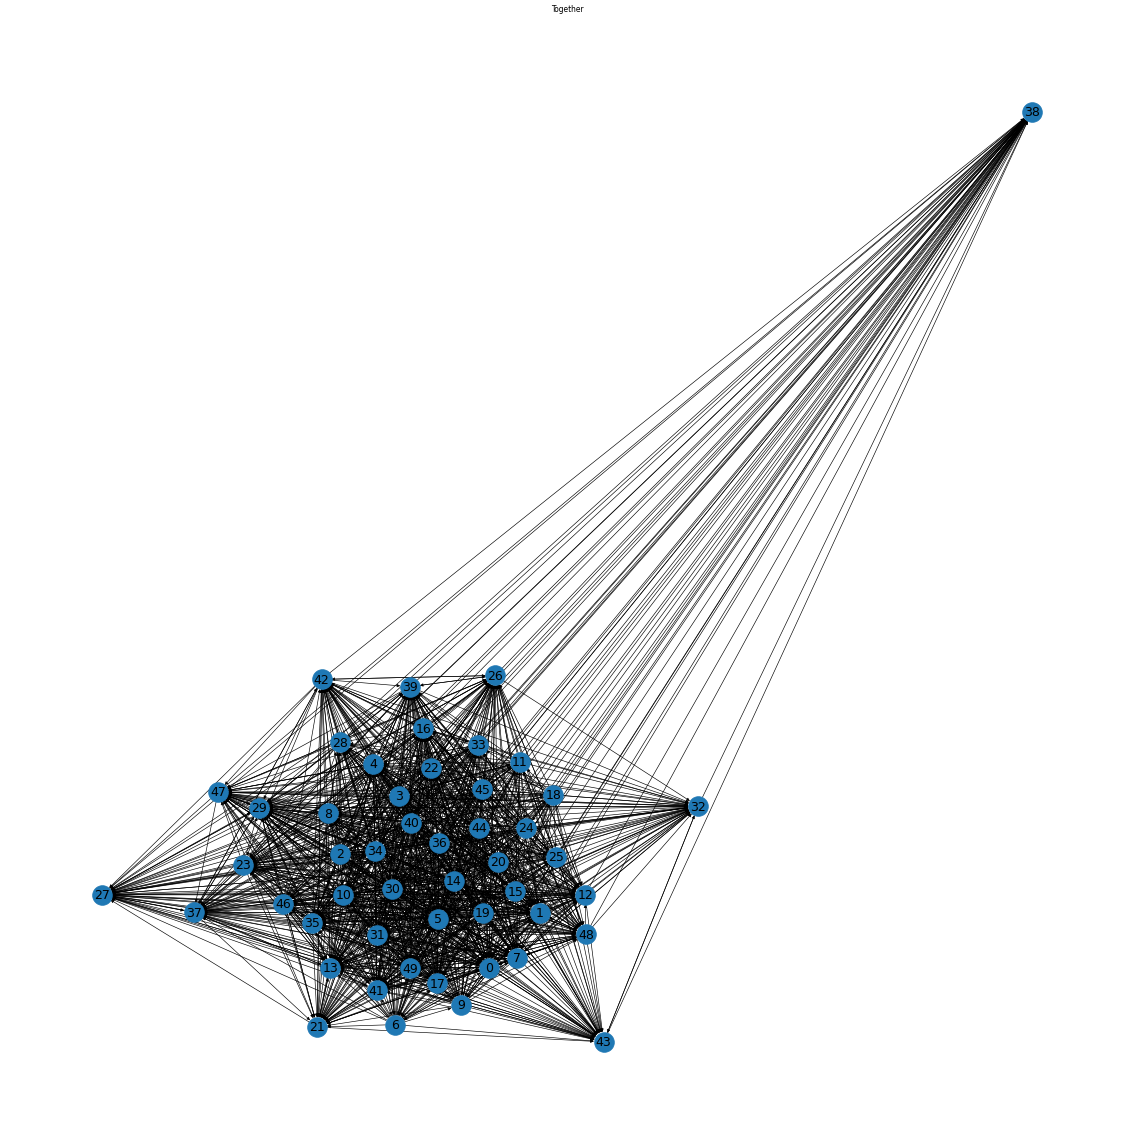

In [9]:
alr_graph = gen_graph_cycles(alr_pairs_rear, 'Alryalat')
itt_graph = gen_graph_cycles(itt_pairs_rear, 'Ittop')
laz_graph = gen_graph_cycles(laz_pairs_rear, 'Lazcano')
mal_graph = gen_graph_cycles(mal_pairs_rear, 'Malik')
sei_graph = gen_graph_cycles(sei_pairs_rear, 'Seibold')
all_graph = gen_graph_cycles(all_pairs_rear, 'Together')

## Cycles

In [36]:
# Cycle functions
# https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.selfloop_edges.html
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cycles.simple_cycles.html
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cycles.find_cycle.html

def cycle_search(graph, name, info_wanted):

    print(f'{name} Graph')

    print(f'Is directed acyclic graph: {nx.is_directed_acyclic_graph(graph)}')

    if info_wanted == 'Topological' or info_wanted == 'All':
        try:
            print(f'Topological Ordering {list(reversed(list(nx.topological_sort(graph))))}')
        except:
            print('This is a cyclic graph, so a topological ordering is not possible.')

    if info_wanted == 'Self' or info_wanted == 'All':
        self_cyc = list(nx.selfloop_edges(graph)) # Node on either end of the edge (a loop)
        print('Self cycles:', self_cyc)

    if info_wanted == 'Simple' or info_wanted == 'All':
        simp_cyc = list(nx.simple_cycles(graph)) # Path to return to any node in the subgraph
        print('Simple cycles', simp_cyc)

    if info_wanted == 'First' or info_wanted == 'All':
        try:
            find_cyc = list(nx.find_cycle(graph, orientation='original')) # Multiple ways to traverse the two nodes
            print('First-depth Traversal Cycles', find_cyc)
        except:
            print('No first-depth traversal cycles found')

    print('\n')

2/24: Note, we are having an issue with Ittoop's graph and the Simple Cycles. It is running until the kernel dies. With lowered pairs, it works, though. So, something is happening as Ittoop's graph grows. Lazcano's ran for over 400 minutes before we stopped it.

In [37]:
# # Simple Cycles
cycle_search(alr_graph, 'Alryalat', 'All')
cycle_search(itt_graph, 'Ittoop', 'Topological')
cycle_search(laz_graph, 'Lazcano', 'Topological')
cycle_search(mal_graph, 'Malik', 'Topological')
cycle_search(sei_graph, 'Seibold', 'All')
cycle_search(all_graph, 'All Raters', 'Topological')

Alryalat Graph
Is directed acyclic graph: True
Topological Ordering [38, 27, 32, 21, 37, 43, 47, 26, 39, 35, 42, 41, 7, 30, 5, 23, 40, 36, 29, 31, 16, 14, 46, 48, 45, 34, 49, 44, 33, 17, 15, 1, 25, 28, 6, 12, 8, 13, 9, 20, 19, 4, 18, 24, 0, 2, 3, 11, 22, 10]
Self cycles: []
Simple cycles []
No first-depth traversal cycles found


Ittoop Graph
Is directed acyclic graph: False
This is a cyclic graph, so a topological ordering is not possible.


Lazcano Graph
Is directed acyclic graph: False
This is a cyclic graph, so a topological ordering is not possible.


Malik Graph
Is directed acyclic graph: False
This is a cyclic graph, so a topological ordering is not possible.


Seibold Graph
Is directed acyclic graph: False
This is a cyclic graph, so a topological ordering is not possible.
Self cycles: []
Simple cycles [[1, 22, 12], [1, 22, 7, 6], [1, 22, 7, 6, 8, 41, 12], [1, 22, 7, 6, 12], [8, 41, 30]]
First-depth Traversal Cycles [(12, 1, 'forward'), (1, 22, 'forward'), (22, 7, 'forward'), (7

# Network Centrality

We will explore measures of the importance of nodes. Let $v$ denote a node, $d_v$ denote the degree of node $v$, and $|N|$ the number of nodes.

## Degree Centrality:

$$ Centrality_{degree}(v) = \frac{d_v}{(|N|-1)} $$ 

In [16]:
deg_in_centrality_alr = nx.in_degree_centrality(alr_graph)
deg_out_centrality_alr = nx.out_degree_centrality(alr_graph)


## Closeness Centrality:

$$ Centrality_{closeness}(v) = \frac{|R(v)|}{|N|-1} \frac{|R(v)|}{\sum_{u \in R(v)}d(u,v)} $$

In the above, $R(v)$ is the set of all nodes that can reach $v$ and $d(u,v)$ is the distance between $u$ and $v$. 

In [17]:
closeness_centrality_alr = nx.closeness_centrality(alr_graph)

## Betweenness Centrality:

$$ Centrality_{betweenness} (v) = \sum_{s,t \in N} (\sigma_{s,t}(v), \sigma_{s,t}) $$

In the above, $\sigma_{s,t}$ is the number of shortest paths between $s$ and $t$ and $\sigma_{s,t} (v)$ is the number of shortest paths between $s$ and $t$ that pass through $v$. 

In [18]:
bet_centrality_alr = nx.betweenness_centrality(alr_graph, normalized = True, 
                                              endpoints = False)

In [12]:
# cycle_search(sei_graph, 'Seibold', 'All')

Seibold Graph
Self cycles: []
Simple cycles [[1, 22, 12], [1, 22, 7, 6], [1, 22, 7, 6, 8, 41, 12], [1, 22, 7, 6, 12], [8, 41, 30]]
First-depth Traversal Cycles [(12, 1, 'forward'), (1, 22, 'forward'), (22, 7, 'forward'), (7, 6, 'forward'), (6, 12, 'forward')]


## Ranking

In [88]:
# Ranking

def rankings(pair_set, name, printing):
    params = choix.ilsr_pairwise(n_items, pair_set, alpha=0.01)
    ranked_params = np.argsort(params)+1
    if printing:
        print(name, ranked_params)

    return ranked_params

alr_rankings = rankings(alr_pairs_rear, 'Alryalat', True)
itt_rankings = rankings(itt_pairs_rear, 'Ittoop', True)
laz_rankings = rankings(laz_pairs_rear, 'Lazcano', True)
mal_rankings = rankings(mal_pairs_rear, 'Malik', True)
sei_rankings = rankings(sei_pairs_rear, 'Seibold', True)
all_rankings = rankings(all_pairs_rear, 'All', True)

Alryalat [39 28 33 48 22 38 44 27 40 36  8 42 31 43  6 17 30 24 15 47 41  7 46 19
 21 29  4 16 20 49 37 10  3 35  5 25 14 45 32  9 50 23 26 13 12 18  1 34
 11  2]
Ittoop [39 28 14 33 44 38 30 22 27 24 48 13 17  2 43  5 49 40 36 42  1 50  6 32
 31 18 29 11 23  9  8 10 47  7 46 15 34  4 12 16 19 45 26 21 20 25 41 35
 37  3]
Lazcano [39 44 30 33 48 28 38 22 43 36 47 24 42 50 14 40 49 46 45 31 35 27 41 34
 37 32 20 17 26 21 23 25 29 16 13 18 19 10 11  8 12 15  7  9  6  5  4  2
  1  3]
Malik [33 30 39 48 38 22 14 28 44 43 24 40  1 13 27 49 36 31  2  5 17 42  6 23
  8 12 15 18 11 50 47 32  7 29  9 46 19 20 21 26 10 41 45 34 16  4 25 37
  3 35]
Seibold [39 30 14 28 33 44 22  1 24 38 43 48 50 17 40 36  2 13 27 31  9 42  8  6
 18 23  7 32 47 29 49  5 46 34 12 15 11 10 16 20  4 21 45 25 41 37 26 35
  3 19]
All [39 28 33 44 38 22 30 48 14 43 24 27 40 36 13 17 42 31  1 49 50  2  8  5
  6 47 32 29 23 46 18  9 11 15 34 45  7 41 10 12 21 20 26 16 35 37 19  4
 25  3]


## Ranking Comparison

Kendall's Tau https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.kendalltau.html

Note, this *does not* weigh based on the ranking. As in, we might want the best and worst to be the most important, but this doesn't weight anything. 

In [140]:
# Ranking function

def kendall_ranking(rankings1, ranking2):
    tau, _ = stats.kendalltau(rankings1, ranking2)

    return tau


alr_kendall_tau = [kendall_ranking(alr_rankings, alr_rankings), kendall_ranking(alr_rankings, itt_rankings), kendall_ranking(alr_rankings, laz_rankings),
                   kendall_ranking(alr_rankings, mal_rankings), kendall_ranking(alr_rankings, sei_rankings), kendall_ranking(alr_rankings, all_rankings)]

itt_kendall_tau = [kendall_ranking(itt_rankings, alr_rankings), kendall_ranking(itt_rankings, itt_rankings), kendall_ranking(itt_rankings, laz_rankings),
                   kendall_ranking(itt_rankings, mal_rankings), kendall_ranking(itt_rankings, sei_rankings), kendall_ranking(itt_rankings, all_rankings)]

laz_kendall_tau = [kendall_ranking(laz_rankings, itt_rankings), kendall_ranking(laz_rankings, itt_rankings), kendall_ranking(laz_rankings, laz_rankings),
                   kendall_ranking(laz_rankings, mal_rankings), kendall_ranking(laz_rankings, sei_rankings), kendall_ranking(laz_rankings, all_rankings)]

mal_kendall_tau = [kendall_ranking(mal_rankings, itt_rankings), kendall_ranking(mal_rankings, itt_rankings), kendall_ranking(mal_rankings, laz_rankings),
                   kendall_ranking(mal_rankings, mal_rankings), kendall_ranking(mal_rankings, sei_rankings), kendall_ranking(mal_rankings, all_rankings)]

sei_kendall_tau = [kendall_ranking(sei_rankings, itt_rankings), kendall_ranking(sei_rankings, itt_rankings), kendall_ranking(sei_rankings, laz_rankings),
                   kendall_ranking(sei_rankings, mal_rankings), kendall_ranking(sei_rankings, sei_rankings), kendall_ranking(sei_rankings, all_rankings)]

all_kendall_tau = [kendall_ranking(all_rankings, itt_rankings), kendall_ranking(all_rankings, itt_rankings), kendall_ranking(all_rankings, laz_rankings),
                   kendall_ranking(all_rankings, mal_rankings), kendall_ranking(all_rankings, sei_rankings), kendall_ranking(all_rankings, all_rankings)]

In [141]:
# Creating the Kendall's Tau dataframe

kendall_dict = {'Alryalat':alr_kendall_tau, 'Ittoop': itt_kendall_tau, 'Lazcano': laz_kendall_tau, 
              'Malik': mal_kendall_tau, 'Seibold': sei_kendall_tau, 'All': all_kendall_tau}
kendall_df = pd.DataFrame(kendall_dict, index = ['Alryalat', 'Ittoop', 'Lazcano', 'Malik', 'Seibold', 'All'])
kendall_df

Alryalat    Ittoop   Lazcano     Malik   Seibold       All
Alryalat  1.000000 -0.237551  0.098776 -0.046531  0.085714 -0.061224
Ittoop   -0.237551  1.000000  0.098776 -0.046531  0.085714 -0.061224
Lazcano   0.200000  0.098776  1.000000 -0.000816  0.013878  0.118367
Malik     0.093878 -0.046531 -0.000816  1.000000  0.113469  0.015510
Seibold  -0.018776  0.085714  0.013878  0.113469  1.000000 -0.035102
All       0.294694 -0.061224  0.118367  0.015510 -0.035102  1.000000

Spearman's $\rho$: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

In [139]:
# Ranking function

def spearmans_rho(rankings1, ranking2):
    rho, _ = stats.spearmanr(rankings1, ranking2)

    return rho


alr_spearmansr = [spearmans_rho(alr_rankings, alr_rankings), spearmans_rho(alr_rankings, itt_rankings), spearmans_rho(alr_rankings, laz_rankings),
                   spearmans_rho(alr_rankings, mal_rankings), spearmans_rho(alr_rankings, sei_rankings), spearmans_rho(alr_rankings, all_rankings)]

itt_spearmansr = [spearmans_rho(itt_rankings, alr_rankings), spearmans_rho(itt_rankings, itt_rankings), spearmans_rho(itt_rankings, laz_rankings),
                   spearmans_rho(itt_rankings, mal_rankings), spearmans_rho(itt_rankings, sei_rankings), spearmans_rho(itt_rankings, all_rankings)]

laz_spearmansr = [spearmans_rho(laz_rankings, itt_rankings), spearmans_rho(laz_rankings, itt_rankings), spearmans_rho(laz_rankings, laz_rankings),
                   spearmans_rho(laz_rankings, mal_rankings), spearmans_rho(laz_rankings, sei_rankings), spearmans_rho(laz_rankings, all_rankings)]

mal_spearmansr = [spearmans_rho(mal_rankings, itt_rankings), spearmans_rho(mal_rankings, itt_rankings), spearmans_rho(mal_rankings, laz_rankings),
                   spearmans_rho(mal_rankings, mal_rankings), spearmans_rho(mal_rankings, sei_rankings), spearmans_rho(mal_rankings, all_rankings)]

sei_spearmansr = [spearmans_rho(sei_rankings, itt_rankings), spearmans_rho(sei_rankings, itt_rankings), spearmans_rho(sei_rankings, laz_rankings),
                   spearmans_rho(sei_rankings, mal_rankings), spearmans_rho(sei_rankings, sei_rankings), spearmans_rho(sei_rankings, all_rankings)]

all_spearmansr = [spearmans_rho(all_rankings, itt_rankings), spearmans_rho(all_rankings, itt_rankings), spearmans_rho(all_rankings, laz_rankings),
                   spearmans_rho(all_rankings, mal_rankings), spearmans_rho(all_rankings, sei_rankings), spearmans_rho(all_rankings, all_rankings)]

In [142]:
# Creating the Kendall's Tau dataframe

spearmansr_dict = {'Alryalat':alr_spearmansr, 'Ittoop': itt_spearmansr, 'Lazcano': laz_spearmansr, 
              'Malik': mal_spearmansr, 'Seibold': sei_spearmansr, 'All': all_spearmansr}
spearmansr_df = pd.DataFrame(spearmansr_dict, index = ['Alryalat', 'Ittoop', 'Lazcano', 'Malik', 'Seibold', 'All'])
spearmansr_df

Alryalat    Ittoop   Lazcano     Malik   Seibold       All
Alryalat  1.000000 -0.343962  0.138247 -0.076303  0.132677 -0.091285
Ittoop   -0.343962  1.000000  0.138247 -0.076303  0.132677 -0.091285
Lazcano   0.305642  0.138247  1.000000  0.005330  0.039232  0.187227
Malik     0.135270 -0.076303  0.005330  1.000000  0.169748  0.024442
Seibold  -0.025114  0.132677  0.039232  0.169748  1.000000 -0.049124
All       0.423577 -0.091285  0.187227  0.024442 -0.049124  1.000000

### MC Ranking Convergence

In [143]:
# MC Function

def MC_rankings_kendall_tau(full_pair_set, full_rankings, times_to_run, percentage_list):
    rankings_arr = []
    for i in range(0, times_to_run):
        ranking_sim_metric = []
        pair_set_shuff = full_pair_set.copy() # We don't want to alter the original list
        np.random.shuffle(pair_set_shuff) # Shuffling the list
        for pct in percentage_list:
            rankings_pct = rankings(pair_set_shuff[:int(np.floor(pct*len(full_pair_set)))], '', False)
            k_tau = kendall_ranking(full_rankings, rankings_pct)
            ranking_sim_metric.append(k_tau)
        rankings_arr.append(ranking_sim_metric)
    df_rankings = pd.DataFrame(rankings_arr) # Creating a dataframe where each row is an MC run and each column is a percentage
    means = list(df_rankings.mean(axis = 0)) # Getting the mean along the columns

    return means

def MC_spearmansr(full_pair_set, full_rankings, times_to_run, percentage_list):
    rankings_arr = []
    for i in range(0, times_to_run):
        ranking_sim_metric = []
        pair_set_shuff = full_pair_set.copy() # We don't want to alter the original list
        np.random.shuffle(pair_set_shuff) # Shuffling the list
        for pct in percentage_list:
            rankings_pct = rankings(pair_set_shuff[:int(np.floor(pct*len(full_pair_set)))], '', False)
            k_tau = spearmans_rho(full_rankings, rankings_pct)
            ranking_sim_metric.append(k_tau)
        rankings_arr.append(ranking_sim_metric)
    df_rankings = pd.DataFrame(rankings_arr) # Creating a dataframe where each row is an MC run and each column is a percentage
    means = list(df_rankings.mean(axis = 0)) # Getting the mean along the columns

    return means

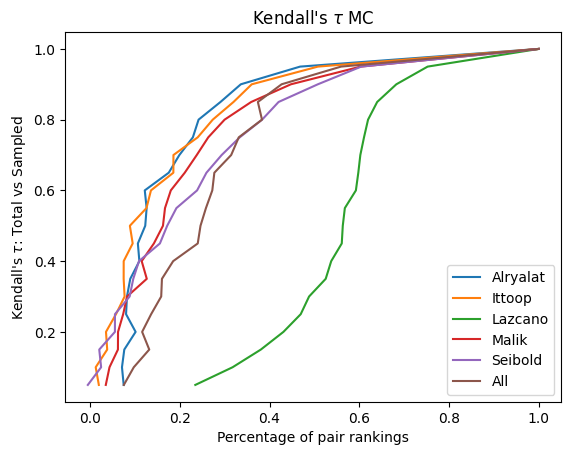

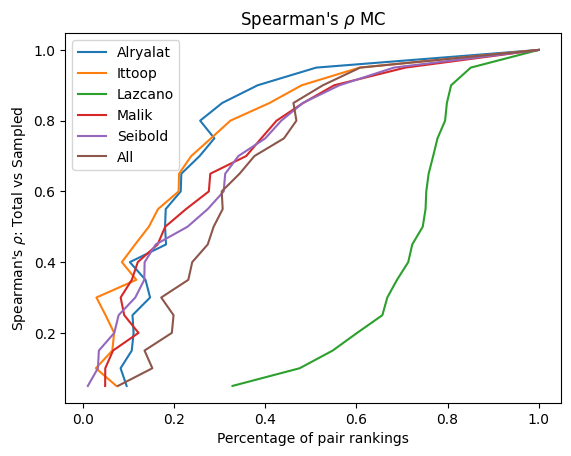

In [147]:
# MC for all

pairs_list = [alr_pairs_rear, itt_pairs_rear, laz_pairs_rear, mal_pairs_rear, sei_pairs_rear, all_pairs_rear]
rankins_list = [alr_rankings, itt_rankings, laz_rankings, mal_rankings, sei_rankings, all_rankings]
names = ['Alryalat', 'Ittoop', 'Lazcano', 'Malik', 'Seibold', 'All']
percentages = np.linspace(0.05, 1, 20)

## Kendall's Tau
for i in range(len(pairs_list)):
    means = MC_rankings_kendall_tau(pairs_list[i], rankins_list[i], 50, percentages)
    plt.plot(means, percentages, label = names[i])
    plt.title(r"Kendall's $\tau$ MC")
    plt.xlabel('Percentage of pair rankings')
    plt.ylabel(r"Kendall's $\tau$: Total vs Sampled")
plt.legend()
plt.show()

## Spearman's Rho
for i in range(len(pairs_list)):
    means = MC_spearmansr(pairs_list[i], rankins_list[i], 50, percentages)
    plt.plot(means, percentages, label = names[i])
    plt.title(r"Spearman's $\rho$ MC")
    plt.xlabel('Percentage of pair rankings')
    plt.ylabel(r"Spearman's $\rho$: Total vs Sampled")
plt.legend()

Regression on the ranks.

# Breaking Cycles

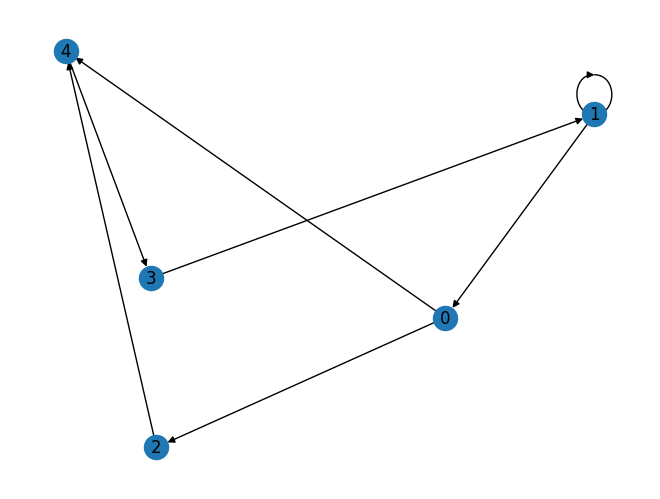

Simple cycles [[1], [0, 2, 4, 3, 1], [0, 4, 3, 1]]


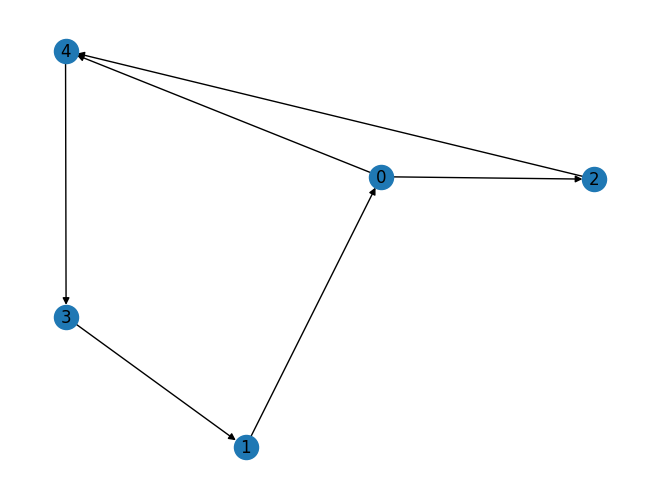

Self cycles: []


In [72]:
n_items = 5 # Note, this is the number of "players", NOT the number of "games"
data = [
    (1, 0), (0, 4), (3, 1),
    (0, 2), (2, 4), (4, 3),
    (1,1)
] # Game outcome

graph = nx.DiGraph() # Creates a graph
graph.add_edges_from(data) # Creates edges and nodes from the data
nx.draw(graph, with_labels=True)
plt.show()

simp_cyc = list(nx.simple_cycles(graph)) # Path to return to any node in the subgraph
print('Simple cycles', simp_cyc)

graph.remove_edges_from(nx.selfloop_edges(graph))
nx.draw(graph, with_labels=True)
plt.show()
self_cyc = list(nx.selfloop_edges(graph)) # Node on either end of the edge (a loop)
print('Self cycles:', self_cyc)

Note, neither Seibold nor Alryalat have any self cycles, so we have not yet tried this on real data.

To do:

1. Figure out how to best break simple cycles.
2. Play with different ranking schemas.
3. See how fast subsets converge to the overall rankings.
